In [1]:
import warnings
import anndata
import scanpy as sc
import Cell_BLAST as cb
import os

warnings.simplefilter("ignore")
cb.config.RANDOM_SEED = 0


[INFO] Cell BLAST: Using GPU 7 as computation device.


## model training

1624

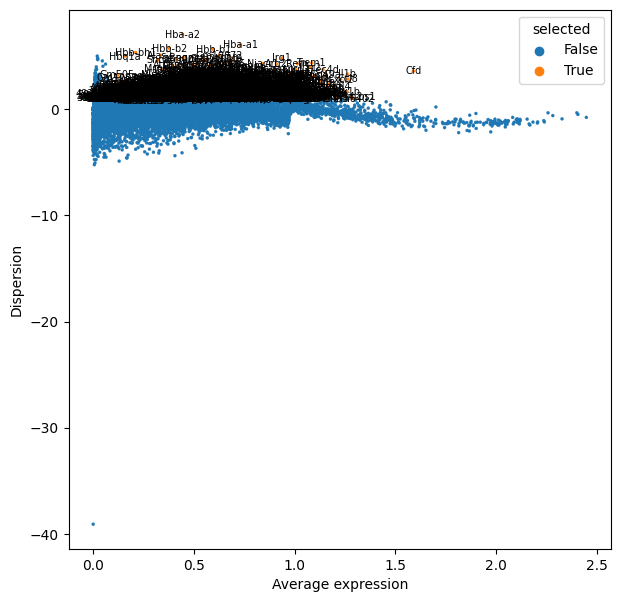

In [2]:
data_dir = "/home/cnic02/wangyn/data/figshare"
fat = anndata.read_h5ad(os.path.join(data_dir, 'Fat_droplet.h5ad'))
axes = cb.data.find_variable_genes(fat, grouping='batch')
fat.var["variable_genes"].sum()

In [3]:

model = cb.directi.fit_DIRECTi(
    fat, genes=fat.var.query("variable_genes").index, batch_effect='batch',
    latent_dim=10, cat_dim=7
)
model.save("/home/cnic02/wangyn/projects/Cell_BLAST/models/directi_fat_1")
del model

cat_dim7
supervisionNone


[INFO] Cell BLAST: Using model path: /tmp/tmptyl0dhti


[DIRECTi epoch 0] train=0.859, val=0.858, time elapsed=0.7s Regular save...
[DIRECTi epoch 1] train=0.858, val=0.858, time elapsed=0.3s
[DIRECTi epoch 2] train=0.859, val=0.858, time elapsed=0.3s
[DIRECTi epoch 3] train=0.858, val=0.857, time elapsed=0.3s
[DIRECTi epoch 4] train=0.856, val=0.853, time elapsed=0.3s
[DIRECTi epoch 5] train=0.811, val=0.679, time elapsed=0.3s
[DIRECTi epoch 6] train=0.615, val=0.652, time elapsed=0.3s
[DIRECTi epoch 7] train=0.580, val=0.595, time elapsed=0.3s
[DIRECTi epoch 8] train=0.580, val=0.593, time elapsed=0.3s
[DIRECTi epoch 9] train=0.578, val=0.584, time elapsed=0.3s
[DIRECTi epoch 10] train=0.577, val=0.575, time elapsed=0.3s Regular save...
[DIRECTi epoch 11] train=0.557, val=0.541, time elapsed=0.3s
[DIRECTi epoch 12] train=0.538, val=0.532, time elapsed=0.3s
[DIRECTi epoch 13] train=0.531, val=0.525, time elapsed=0.3s
[DIRECTi epoch 14] train=0.521, val=0.515, time elapsed=0.3s
[DIRECTi epoch 15] train=0.511, val=0.507, time elapsed=0.3s
[D

## model inference


In [6]:
# data_dir = "/home/cnic02/wangyn/data/figshare"
# fat = anndata.read_h5ad(os.path.join(data_dir, 'Fat_droplet.h5ad'))
data_dir = "/home/cnic02/wangyn/data/figshare"
fat = anndata.read_h5ad(os.path.join(data_dir, 'Fat_droplet.h5ad'))


model = cb.directi.DIRECTi.load("/home/cnic02/wangyn/projects/Cell_BLAST/models/directi_fat_1")
fat.obsm["X_gau"],fat.obsm["X_cat"], fat.obsm["X_latent"] = model.inference(fat)

priority:auto
expres.shape:torch.Size([4096, 1624])
lib.shapetorch.Size([4096, 1])
inference here
x.shapetorch.Size([4096, 128])
expres.shape:torch.Size([984, 1624])
lib.shapetorch.Size([984, 1])
inference here
x.shapetorch.Size([984, 128])
(5080, 10) (5080, 7) (5080, 10)


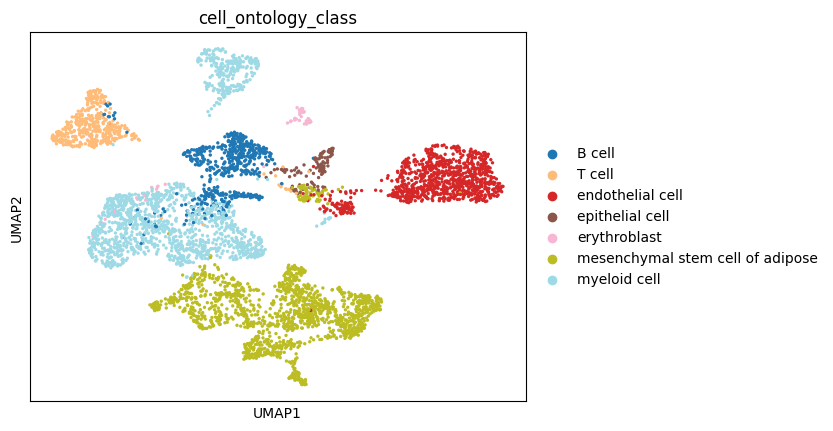

In [7]:
sc.pp.neighbors(fat, use_rep="X_latent")
sc.tl.umap(fat)
sc.pl.umap(fat, color="cell_ontology_class", palette="tab20")

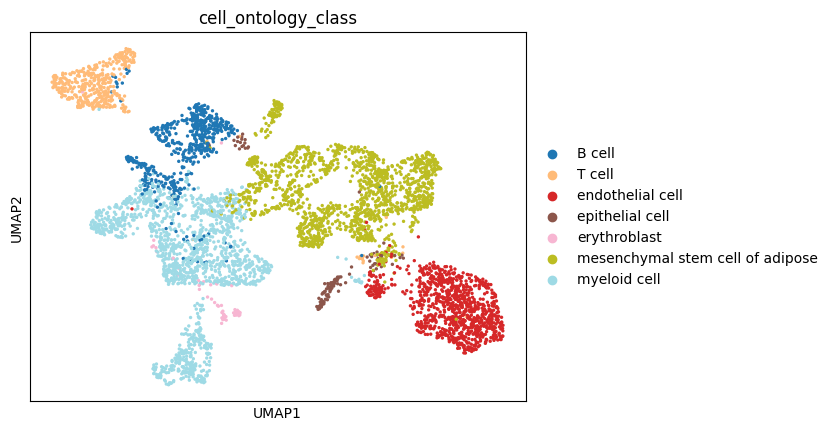

In [5]:
sc.pp.neighbors(fat, use_rep="X_gau")
sc.tl.umap(fat)
sc.pl.umap(fat, color="cell_ontology_class", palette="tab20")

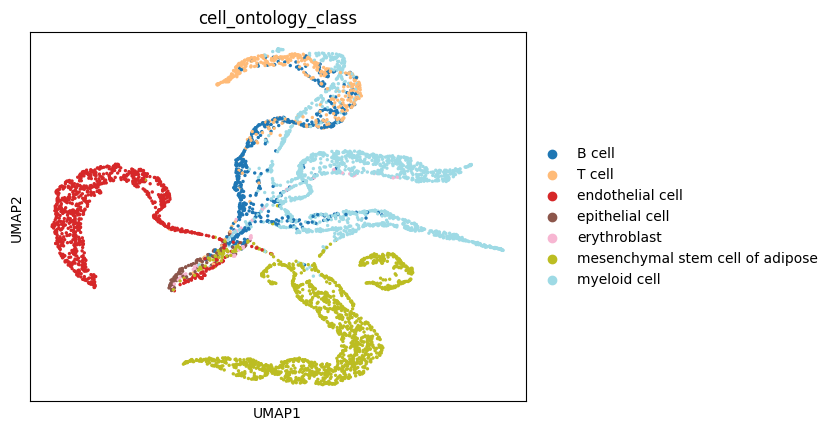

In [8]:
sc.pp.neighbors(fat, use_rep="X_cat")
sc.tl.umap(fat)
sc.pl.umap(fat, color="cell_ontology_class", palette="tab20")

In [ ]:
spleen = anndata.read_h5ad(os.path.join(data_dir,"Spleen_droplet.h5ad"))
spleen.obsm["X_gau"],spleen.obsm["X_cat"], spleen.obsm["X_latent"] = model.inference(spleen)

In [ ]:
sc.pp.neighbors(spleen, use_rep="X_latent")
sc.tl.umap(spleen)
sc.pl.umap(spleen, color="cell_ontology_class", palette="tab20")

In [ ]:
sc.pp.neighbors(spleen, use_rep="X_gau")
sc.tl.umap(spleen)
sc.pl.umap(spleen, color="cell_ontology_class", palette="tab20")

In [ ]:
sc.pp.neighbors(spleen, use_rep="X_cat")
sc.tl.umap(spleen)
sc.pl.umap(spleen, color="cell_ontology_class", palette="tab20")

In [ ]:

# data_dir = "/home/cnic02/wangyn/data/figshare"
# fat = anndata.read_h5ad(os.path.join(data_dir, 'Fat_droplet.h5ad'))
data_dir = "/home/cnic02/wangyn/data"
fat = anndata.read_h5ad(os.path.join(data_dir, 'Baron_human.h5ad'))


model = cb.directi.DIRECTi.load("/home/cnic02/wangyn/projects/Cell_BLAST/docs/baron_human_model")
fat.obsm["X_gau"],fat.obsm["X_cat"], fat.obsm["X_latent"] = model.inference(fat)

In [ ]:
sc.pp.neighbors(fat, use_rep="X_cat")
sc.tl.umap(fat)
sc.pl.umap(fat, color="cell_ontology_class", palette="tab20")

In [ ]:
sc.pp.neighbors(fat, use_rep="X_gau")
sc.tl.umap(fat)
sc.pl.umap(fat, color="cell_ontology_class", palette="tab20")

In [ ]:
sc.pp.neighbors(fat, use_rep="X_latent")
sc.tl.umap(fat)
sc.pl.umap(fat, color="cell_ontology_class", palette="tab20")

In [ ]:
combined_adata = anndata.AnnData.concatenate(
    anndata.read_h5ad(os.path.join(data_dir,"Lung_droplet.h5ad")),
    anndata.read_h5ad(os.path.join(data_dir,"Mammary_Gland_droplet.h5ad")),
    anndata.read_h5ad(os.path.join(data_dir,"Skin_droplet.h5ad")),
    anndata.read_h5ad(os.path.join(data_dir,"Trachea_droplet.h5ad")),
    join="outer", batch_key="study", batch_categories=["Lung_droplet", "Mammary_Gland_droplet", "Skin_droplet.h5ad", "Trachea_droplet"]
)
# capture
axes = cb.data.find_variable_genes(combined_adata, grouping="study", min_group_frac=0.4)
combined_adata.var["variable_genes"].sum()

In [ ]:
%%capture
model = cb.directi.fit_DIRECTi(
    combined_adata, genes=combined_adata.var.query("variable_genes").index,
    latent_dim=10, cat_dim=20
)
fat.obsm["X_gau"],fat.obsm["X_cat"],fat.obsm["X_latent"] = model.inference(fat)

In [ ]:
sc.pp.neighbors(fat, use_rep="X_gau")
sc.tl.umap(fat)
sc.pl.umap(fat, color="cell_ontology_class", palette="tab20")

In [ ]:
sc.pp.neighbors(fat, use_rep="X_latent")
sc.tl.umap(fat)
sc.pl.umap(fat, color="cell_ontology_class", palette="tab20")

In [ ]:
sc.pp.neighbors(fat, use_rep="X_cat")
sc.tl.umap(fat)
sc.pl.umap(fat, color="cell_ontology_class", palette="tab20")

In [ ]:
sc.pp.neighbors(fat, use_rep="X_cat")
sc.tl.umap(fat)
sc.pl.umap(fat, color="batch", palette="tab20")

In [ ]:
sc.pp.neighbors(fat, use_rep="X_latent")
sc.tl.umap(fat)
sc.pl.umap(fat, color="batch", palette="tab20")

In [ ]:
sc.pp.neighbors(fat, use_rep="X_gau")
sc.tl.umap(fat)
sc.pl.umap(fat, color="batch", palette="tab20")